### Dataset :
LINK = https://www.kaggle.com/competitions/boston-housing/data

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
train_path = "Data/train.csv"

In [5]:
df = pd.read_csv(train_path)

In [6]:
df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [7]:
df.columns.to_list()

['ID',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [8]:
Feature_columns = ['ID','crim','zn','indus','chas','nox','rm',
                   'age','dis','rad','tax','ptratio','black','lstat']

In [9]:
df.shape

(333, 15)

In [10]:
def basic_summary(df):
    summarry_info = {
        "missing_values":df.isnull().sum(),
        "dtypes":df.dtypes,
        "stats":df.describe().T
    }
    return summarry_info

In [11]:
basic_summary(df)

{'missing_values': ID         0
 crim       0
 zn         0
 indus      0
 chas       0
 nox        0
 rm         0
 age        0
 dis        0
 rad        0
 tax        0
 ptratio    0
 black      0
 lstat      0
 medv       0
 dtype: int64,
 'dtypes': ID           int64
 crim       float64
 zn         float64
 indus      float64
 chas         int64
 nox        float64
 rm         float64
 age        float64
 dis        float64
 rad          int64
 tax          int64
 ptratio    float64
 black      float64
 lstat      float64
 medv       float64
 dtype: object,
 'stats':          count        mean         std  ...        50%        75%       max
 ID       333.0  250.951952  147.859438  ...  244.00000  377.00000  506.0000
 crim     333.0    3.360341    7.352272  ...    0.26169    3.67822   73.5341
 zn       333.0   10.689189   22.674762  ...    0.00000   12.50000  100.0000
 indus    333.0   11.293483    6.998123  ...    9.90000   18.10000   27.7400
 chas     333.0    0.060060    0.2379

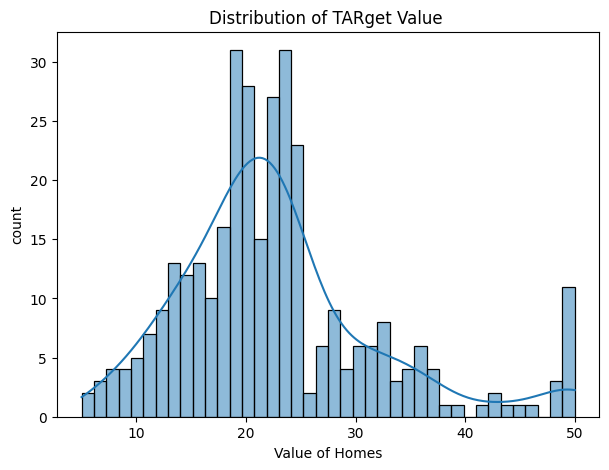

In [12]:
plt.figure(figsize=(7,5))
sns.histplot(df["medv"],kde=True,bins= 40)
plt.title("Distribution of TARget Value ")
plt.xlabel("Value of Homes")
plt.ylabel("count")
plt.show()

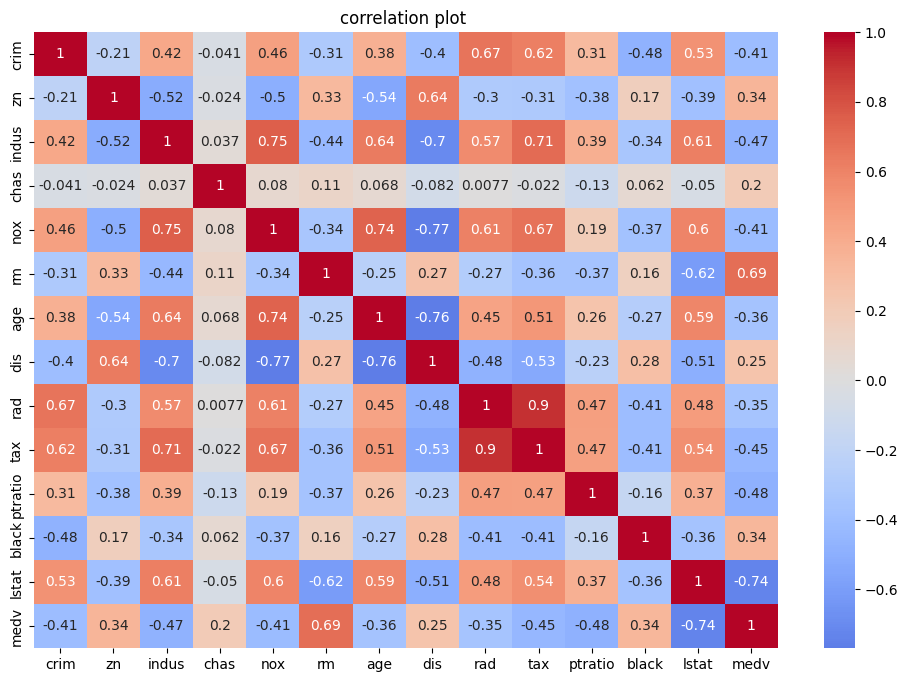

In [13]:
plt.figure(figsize=(12,8))
corr = df.drop(columns=["ID"]).corr()
sns.heatmap(data=corr,annot=True,cmap="coolwarm",center=0)
plt.title("correlation plot ")
plt.show()

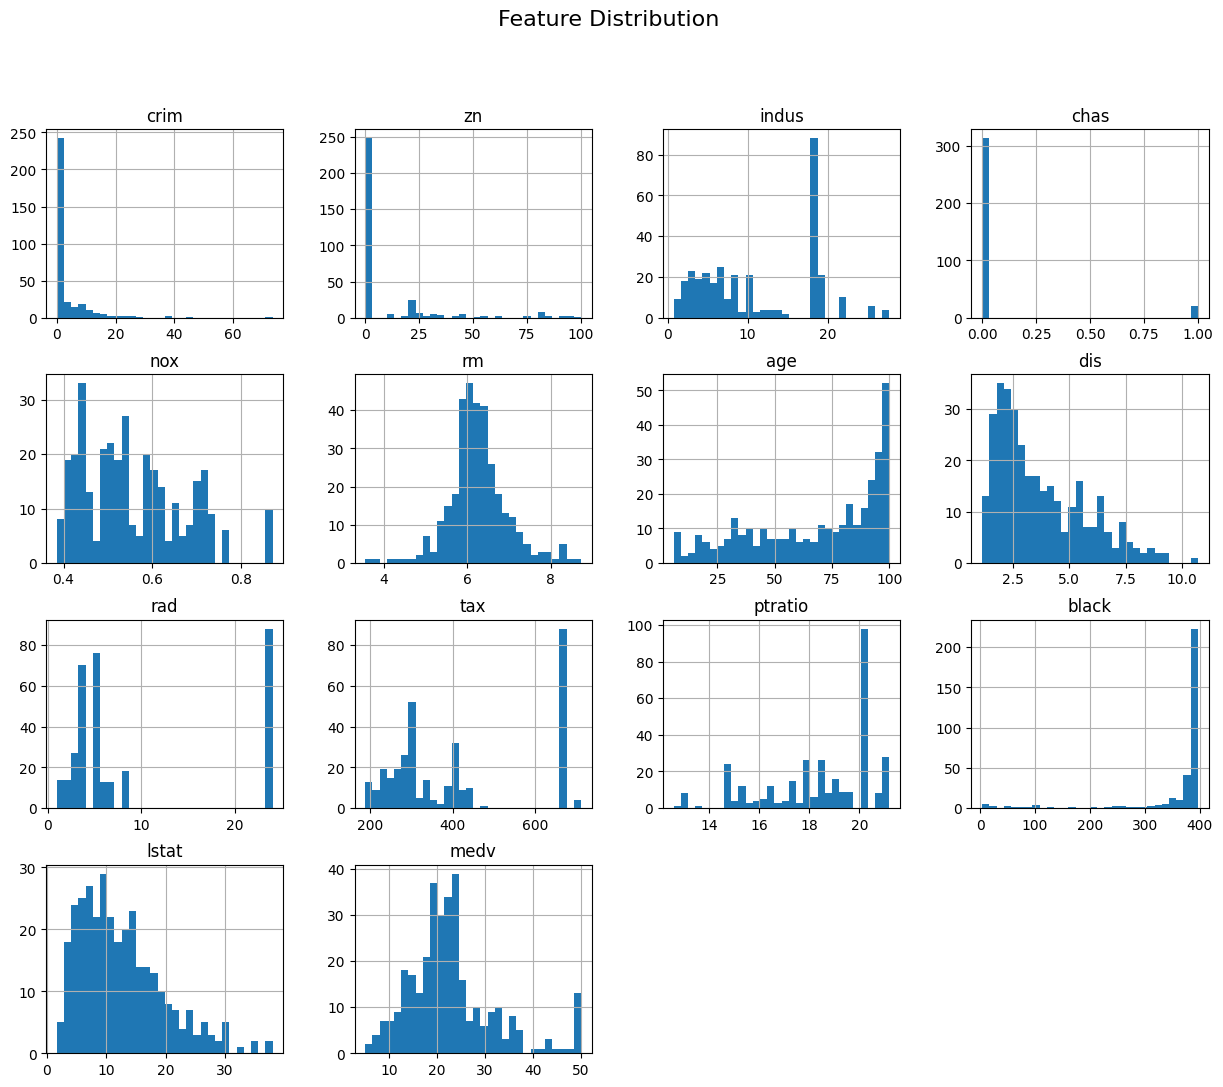

In [14]:
df.drop(columns=["ID"]).hist(figsize=(15,12),bins=30)
plt.suptitle("Feature Distribution",fontsize= 16)
plt.show()

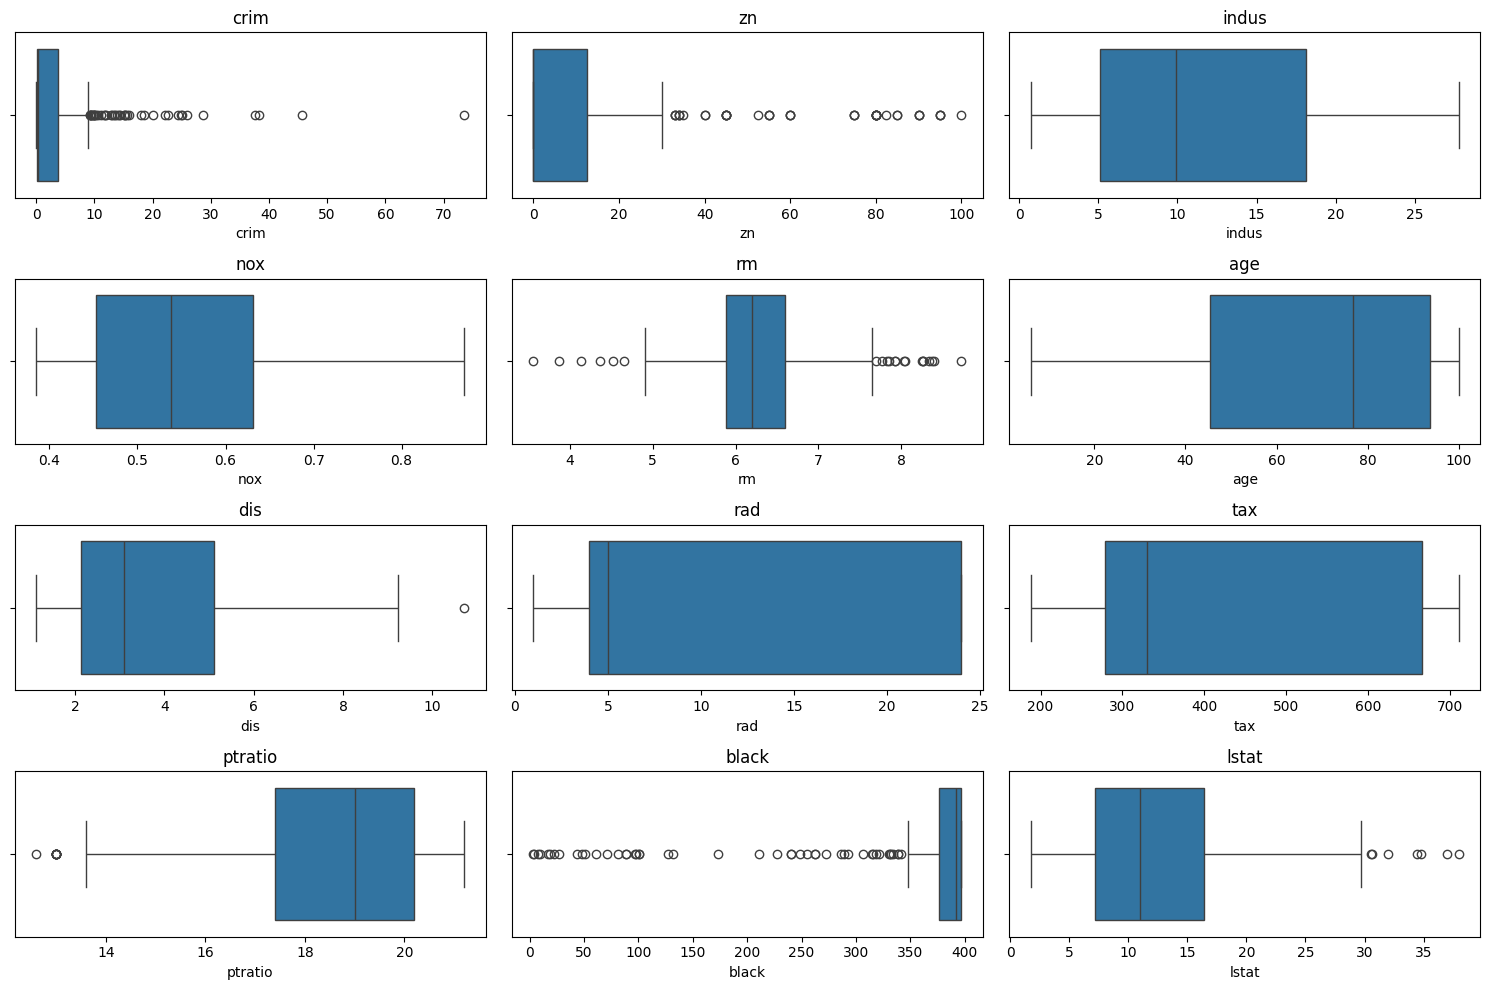

In [15]:
numeric_cols = df.drop(columns=["ID","chas","medv"]).columns
plt.figure(figsize=(15,10))
for i , col in enumerate(numeric_cols,start=1):
    plt.subplot(4,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor , LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [17]:
X = df.drop(columns=["ID","medv"])
y = df["medv"]

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
numeric_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'black', 'lstat']
categorical_features = ['chas', 'rad']


In [19]:
numeric_transformer = StandardScaler()

In [20]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore",drop="first")

In [24]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num",numeric_transformer,numeric_features),
        ("cat",categorical_transformer,categorical_features)
    ],remainder="passthrough"
)

In [25]:
X_train_processed= preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [26]:
# TRAIN MODEL USING SGDREGRESSOR
sgd_reg = SGDRegressor(
    max_iter=1000,
    eta0=0.01, # Learning rate
    random_state=42
)

In [28]:
sgd_reg.fit(X_train_processed, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [29]:
sgd_reg.coef_, sgd_reg.intercept_

(array([-0.37793492,  1.44808695, -0.32132364, -1.5279343 ,  2.37526604,
        -0.39357937, -3.52899026, -1.15657335, -1.55039072,  0.69211284,
        -4.38475817,  3.31127451,  0.61052522,  2.96089653,  1.49482397,
         1.75925969,  0.39099955,  2.33406478,  3.64693471,  6.0595485 ]),
 array([19.7992466]))

In [30]:
len(sgd_reg.coef_)

20

In [32]:
# OLS
linear_reg_ols = LinearRegression()
linear_reg_ols.fit(X_train_processed, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Test Model

In [33]:
# With SGD
y_test_pred = sgd_reg.predict(X_test_processed)
y_train_pred = sgd_reg.predict(X_train_processed)

In [34]:
# with OLS
y_test_pred_ols = linear_reg_ols.predict(X_test_processed)
y_train_pred_ols = linear_reg_ols.predict(X_train_processed)

In [35]:
def plot_actual_vs_predicted_lines(y_actual, y_predicted):
    plt.figure(figsize=(14, 7))

    if isinstance(y_actual, pd.Series):
        y_actual = y_actual.values
    
    plt.plot(y_actual, label='Actual Values', color='#1f77b4', linewidth=2)

    plt.plot(y_predicted, label='Predicted Values', color='#ff7f0e', linewidth=2, linestyle='--')
    
    plt.title('Actual vs. Predicted Values Over Index (Trend Comparison)')
    plt.xlabel('Data Index')
    plt.ylabel('Median Home Value')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

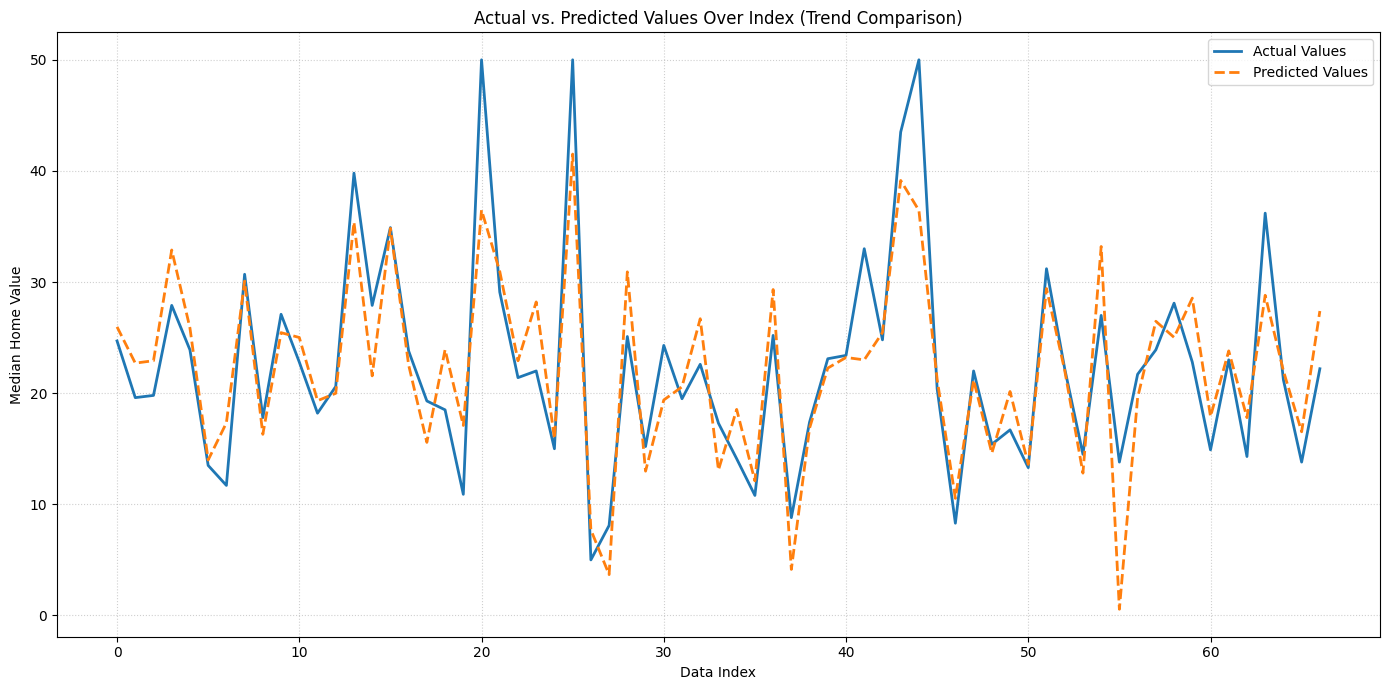

In [37]:
plot_actual_vs_predicted_lines(y_test, y_test_pred)

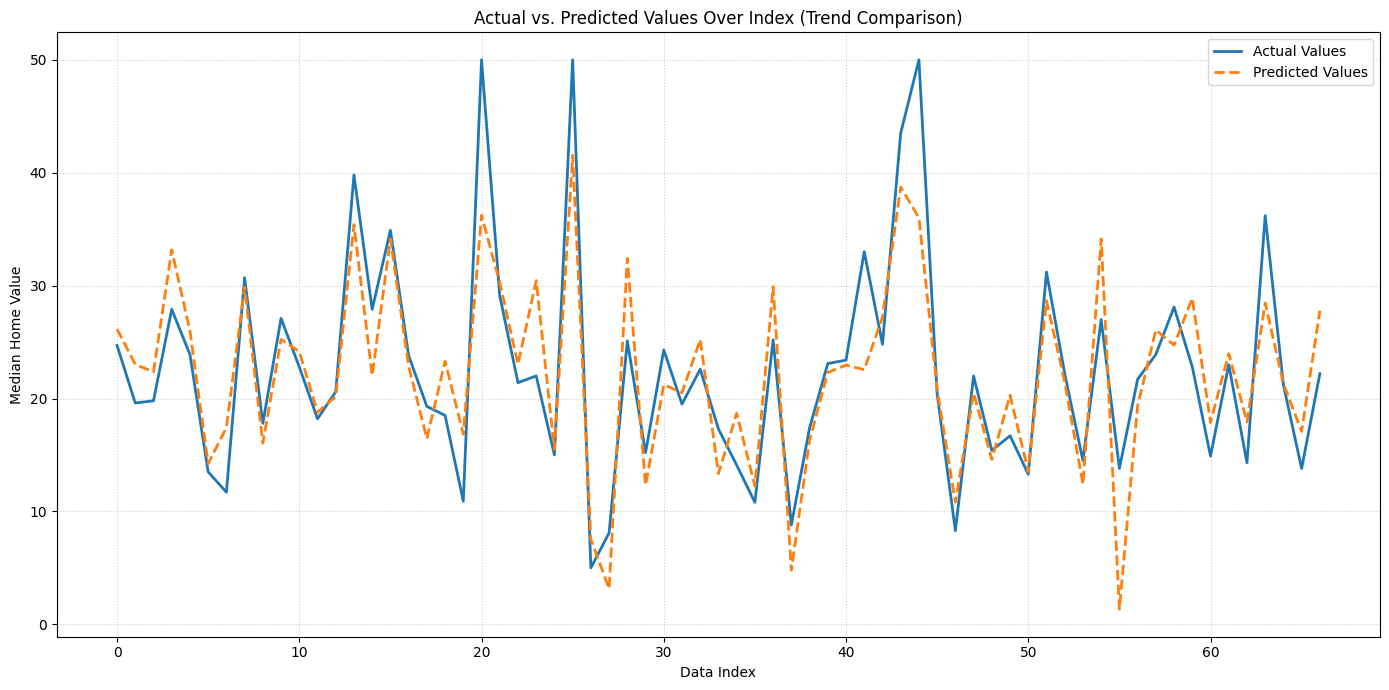

In [38]:
plot_actual_vs_predicted_lines(y_test, y_test_pred_ols)

In [39]:
# Evaluation
from sklearn.metrics import mean_squared_error

In [41]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE (TRAIN) (SGD) : {mse_train}")
print(f"MSE (TEST) (SGD): {mse_test}")

MSE (TRAIN) (SGD) : 22.10430713998983
MSE (TEST) (SGD): 21.3468967417432


In [42]:
mse_train_ols = mean_squared_error(y_train, y_train_pred_ols)
mse_test_ols = mean_squared_error(y_test, y_test_pred_ols)

print(f"MSE (TRAIN) (OLS) : {mse_train_ols}")
print(f"MSE (TEST) (OLS) : {mse_test_ols}")

MSE (TRAIN) (OLS) : 21.609672351240093
MSE (TEST) (OLS) : 22.38212616164285


## save artifactes


In [43]:
import joblib

In [44]:
model_filename = 'final_sgd_reg_model.joblib'
preprocessor_filename = 'data_preprocessor.joblib'

In [45]:
joblib.dump(sgd_reg, model_filename)
joblib.dump(preprocessor, preprocessor_filename)

['data_preprocessor.joblib']

In [46]:
print(f"\nModel saved to: {model_filename}")
print(f"Preprocessor saved to: {preprocessor_filename}")


Model saved to: final_sgd_reg_model.joblib
Preprocessor saved to: data_preprocessor.joblib
